In [3]:
main_dir = '/Users/matin/Downloads/testProjs/intracellular_M'
import sys
sys.path.insert(0,main_dir)
import numpy as np
import json
import matplotlib.pyplot as plt
import tellurium as te
import os
%load_ext autoreload
%autoreload
%matplotlib inline 
plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
%config Completer.use_jedi = False
showOriginalModelString = True


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'IL8': 0.37766464414001444, 'k_il8_p': 8217.591872875379, 'k_il8_d': 0.9593890276472528, 'IL8R': 1104.5560372997643, 'IL8_R': 3387.8851261378554, 'k_il8_b': 0.027448492828167248, 'k_il8_ub': 0.824522108766517, 'k_il8r_p': 876.7160655857336, 'k_il8r_d': 0.766460250674702, 'kd_irak_p': 43656.813373538265, 'n_irak_p': 5.013616210408761}
t2m: 1 
P2 is plotting


<Figure size 1440x288 with 0 Axes>

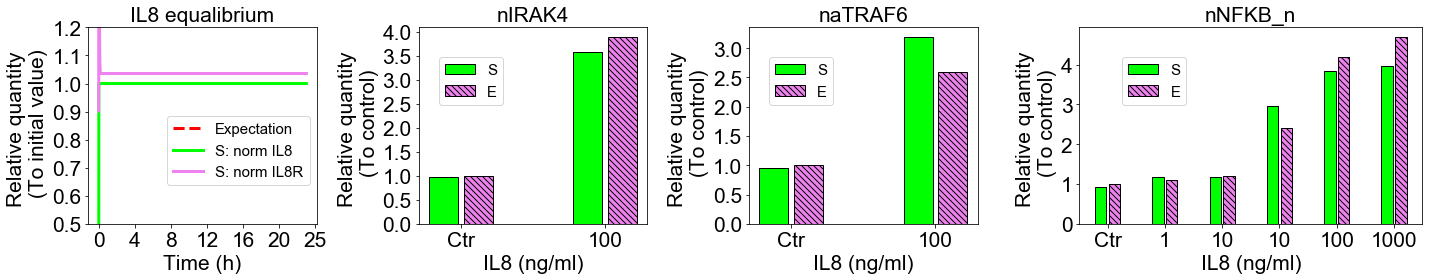

<Figure size 1512x288 with 0 Axes>

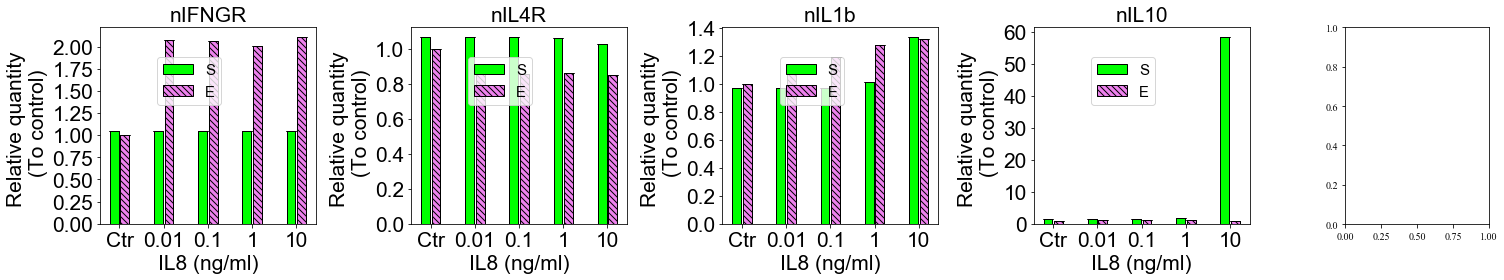

In [8]:
###----sim vs obs-----###
%load_ext autoreload
%autoreload
from data.observations import observations,t2m,select_obs
from models.params import fixed_params
from tools import dirs, tools
from models.models import Macrophage
from plots import funcs 
params = {**fixed_params}
if True: # apply inferred params
    target_package = 'P21'
    with open(os.path.join(dirs.dir_outputs,'inferred_params_{}.json'.format(target_package)),'r') as file:
        inferred_params = json.load(file)
    params = {**params,**inferred_params}
print(params)
print('t2m: {} '.format(t2m))
flags = {
    'P1': False,
    'P4': False,
    'P2': True
}
for key,value in flags.items():
    if key == 'P1' and value : 
        model_t = 'M1'
        model_sbml = Macrophage.models[model_t]
        print(model_sbml['Mg_e'])
        macrophage_obj = Macrophage(model_t = model_t)
        params = {}
        print('P1_3 is plotting')
        funcs.P1_eq_plot(model_sbml=model_sbml,params={},observations=observations)
        funcs.P1_qualitative_plot (model_sbml=model_sbml,params=params,observations=observations)
        fig = funcs.P1_plot (model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)
        
    elif key == 'P4' and value : 
        dir_model = dirs.dir_model
        model_sbml = te.loadSBMLModel(dir_model)
        macrophage_obj = Macrophage(dir_model = dir_model)
        print('P4 is plotting')
        funcs.P4_plot(model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)
    elif key == 'P2' and value : 
        model_t = 'IL8'
        model_sbml = Macrophage.models[model_t]
        macrophage_obj = Macrophage(model_t = model_t)
        print('P2 is plotting')
        funcs.P21_plot(model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)
        funcs.P22_plot(model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)


In [ ]:
##---test----#
%load_ext autoreload
%autoreload
from data.observations import observations,t2m,select_obs
from models.params import fixed_params
from tools import dirs, tools
from models.models import Macrophage
from plots import funcs 
params = {**fixed_params}
if True: # apply inferred params
    target_package = 'P2'
    with open(os.path.join(dirs.dir_outputs,'inferred_params_{}.json'.format(target_package)),'r') as file:
        inferred_params = json.load(file)
    params = {**params,**inferred_params}
model_sbml = Macrophage.models['IL8']
# tag = 'IFNGR'
tag = 'NFKB_n'
# tag = 'IL8_R'
# tag = 'IL8R'
value = 1

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rr = Macrophage.run_sbml_model(model_sbml=model_sbml, duration=1440,params = {},selections=['TIME',tag])
ax.plot(rr['time'],rr[tag],label = 'Ctr')
rr = Macrophage.run_sbml_model(model_sbml=model_sbml, duration=1440,params = {},selections=['TIME',tag],activation=True)
ax.plot(rr['time'],rr[tag],label = 'Ctr_a')
# rr = Macrophage.run_sbml_model(model_sbml=model_sbml, duration=1440,params = {**params,'IL8':value},selections=['TIME',tag])
# ax.plot(rr['time'],rr[tag],label = '{}'.format(value) )
# rr = Macrophage.run_sbml_model(model_sbml=model_sbml, duration=1440,params = {**params,'IL8':value},selections=['TIME',tag],activation=True)
# ax.plot(rr['time'],rr[tag],label = '{} - a'.format(value) )
ax.legend()

In [ ]:
###-----plot observation-----###
from data.observations import observations

x = observations['R05_19']['measurement_scheme']['Mg_Mg_ATP']
y1 = observations['R05_19']['Mg_19']['expectations']['Mg_Mg_ATP']['mean']
# y2 = observations['eq_mg']['Mg_10']['expectations']['Mg']['mean']
# y3 = observations['eq_mg']['Mg_20']['expectations']['Mg']['mean']
plot(x=x,y=y1)